In [74]:
options(repr.plot.width=10, repr.plot.height=6)

In [78]:
library(tidyverse)
library(imputeTS)

In [2]:
commodities <- read.csv('../data/processed/commodities.csv', stringsAsFactors=FALSE) %>% 
    mutate(Date = as.Date(Date))
head(commodities)

Date,SoybeanOilPrice,SoybeanMealPrice,CornPrice,CanolaPrice,WheatPrice,OilPrice,SoybeanPrice,GDPDef,SoybeanOilRealPrice,⋯,WheatDiff,OilDiff,SoybeanDiff,SoybeanOilGrowth,SoybeanMealGrowth,CornGrowth,CanolaGrowth,WheatGrowth,OilGrowth,SoybeanGrowth
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2001-01-02,14.53,192.0,220.75,NA,276.25,NA,495.00,0.7920932,18.34380,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2001-01-03,14.63,191.7,223.50,NA,283.25,NA,497.25,0.7921464,18.46881,⋯,8.81331766,NA,2.798397,6.814663e-03,0.9226933,0.012389507,NA,0.0252704767,NA,0.004477962
2001-01-04,14.51,189.8,223.75,NA,284.25,NA,492.25,0.7921997,18.31609,⋯,1.23828528,NA,-6.353712,-8.268956e-03,0.9137050,0.001051310,NA,0.0034630301,NA,-0.010121811
2001-01-05,14.58,187.7,220.00,NA,283.00,NA,489.50,0.7922529,18.40321,⋯,-1.60188336,NA,-3.512857,4.756757e-03,0.9124204,-0.016825829,NA,-0.0044644203,NA,-0.005653395
2001-01-08,14.70,187.4,219.25,NA,283.00,NA,491.00,0.7924126,18.55094,⋯,-0.07197564,NA,1.768458,8.027300e-03,0.9205234,-0.003609898,NA,-0.0002014944,NA,0.002862240
2001-01-09,14.70,190.5,221.75,NA,285.00,NA,495.25,0.7924658,18.54970,⋯,2.49978286,NA,5.321393,-6.716028e-05,0.9380320,0.011334582,NA,0.0069995029,NA,0.008588063


Warning message:
“Removed 39 rows containing missing values (geom_path).”

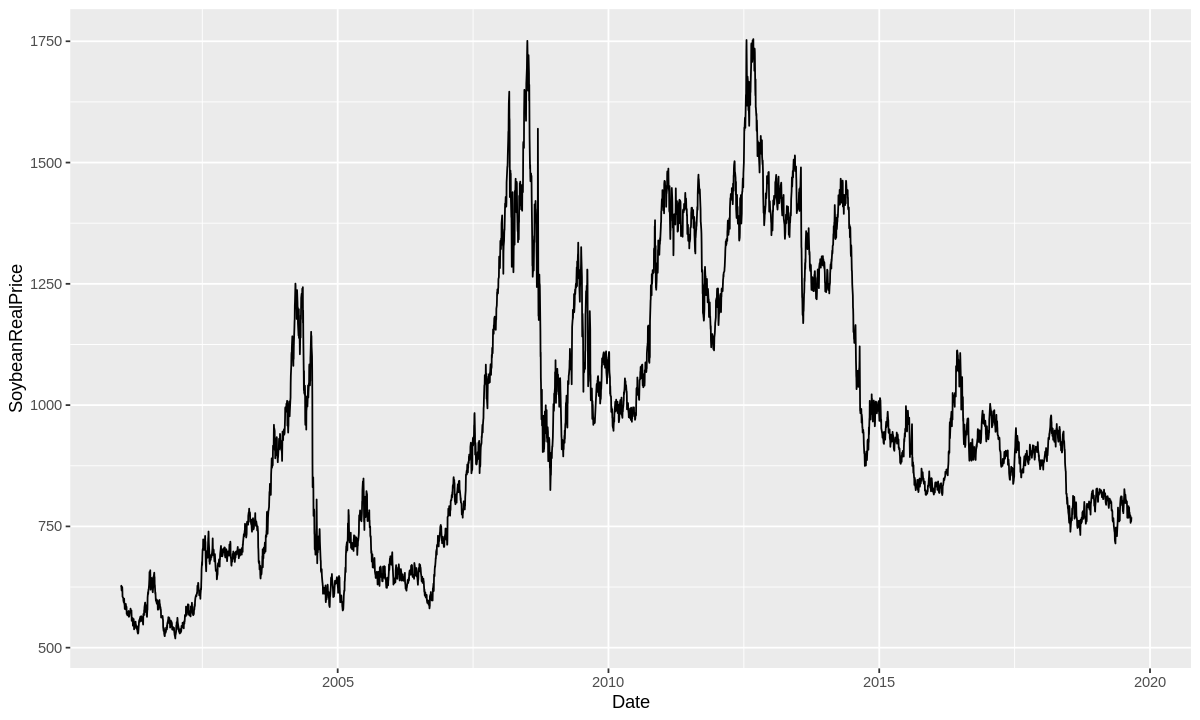

In [6]:
ggplot(commodities) +
    geom_line(aes(Date, SoybeanRealPrice))

Warning message:
“Removed 39 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

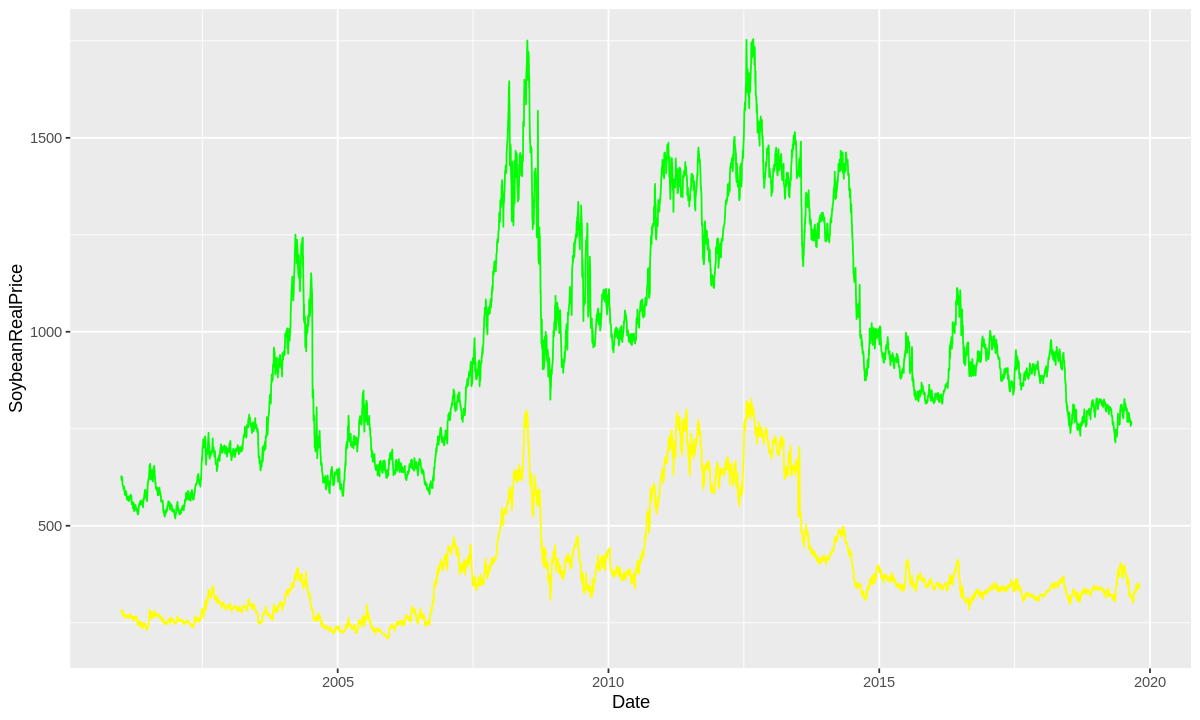

In [8]:
ggplot(commodities) +
    geom_line(aes(Date, SoybeanRealPrice), color='green') +
    geom_line(aes(Date, CornRealPrice), color='yellow')

Warning message:
“Removed 42 rows containing missing values (geom_point).”

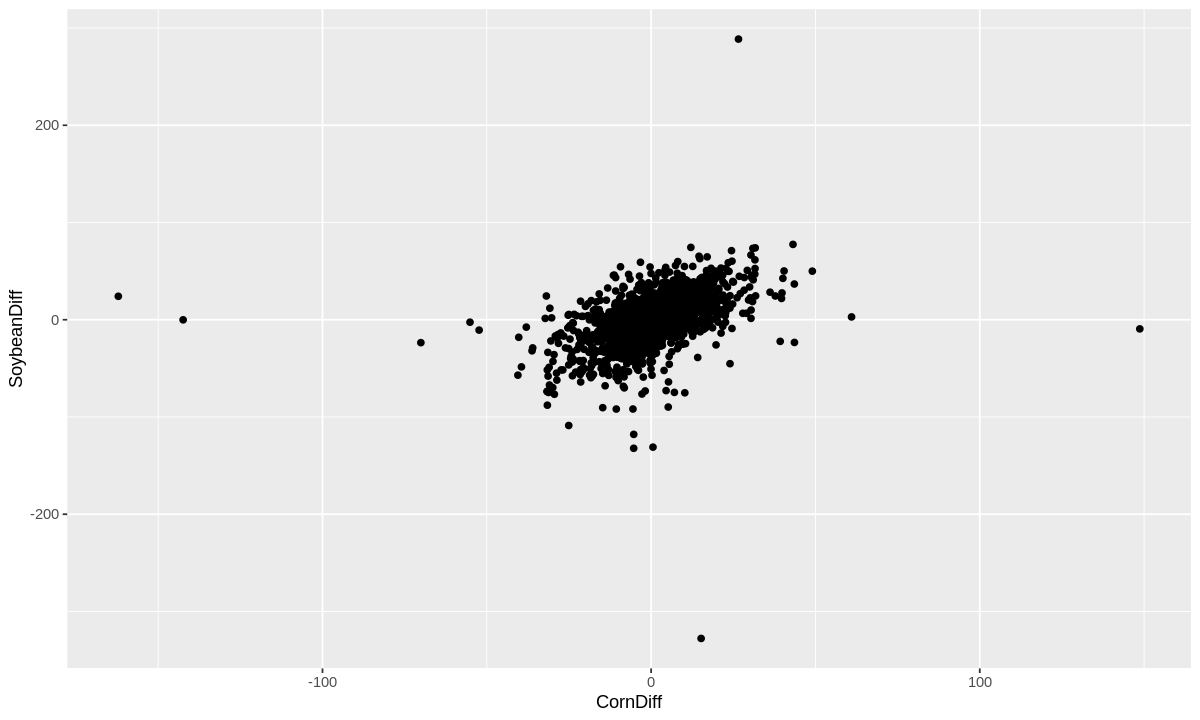

In [9]:
ggplot(commodities) +
    geom_point(aes(CornDiff, SoybeanDiff))

In [10]:
summary(lm(SoybeanDiff~CornDiff, data=commodities))


Call:
lm(formula = SoybeanDiff ~ CornDiff, data = commodities)

Residuals:
    Min      1Q  Median      3Q     Max 
-341.48   -6.02    0.37    6.52  264.65 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02369    0.23046   0.103    0.918    
CornDiff     0.90050    0.02575  34.974   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.82 on 4709 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.2062,	Adjusted R-squared:  0.206 
F-statistic:  1223 on 1 and 4709 DF,  p-value: < 2.2e-16


In [11]:
summary(lm(SoybeanDiff~CornDiff, data=filter(commodities, abs(CornDiff) < 100, abs(SoybeanDiff < 100))))


Call:
lm(formula = SoybeanDiff ~ CornDiff, data = filter(commodities, 
    abs(CornDiff) < 100, abs(SoybeanDiff < 100)))

Residuals:
    Min      1Q  Median      3Q     Max 
-344.35   -6.04    0.39    6.64   64.73 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.07249    0.21572  -0.336    0.737    
CornDiff     1.09565    0.02667  41.088   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.8 on 4705 degrees of freedom
Multiple R-squared:  0.2641,	Adjusted R-squared:  0.2639 
F-statistic:  1688 on 1 and 4705 DF,  p-value: < 2.2e-16


Warning message:
“Removed 42 rows containing missing values (geom_point).”

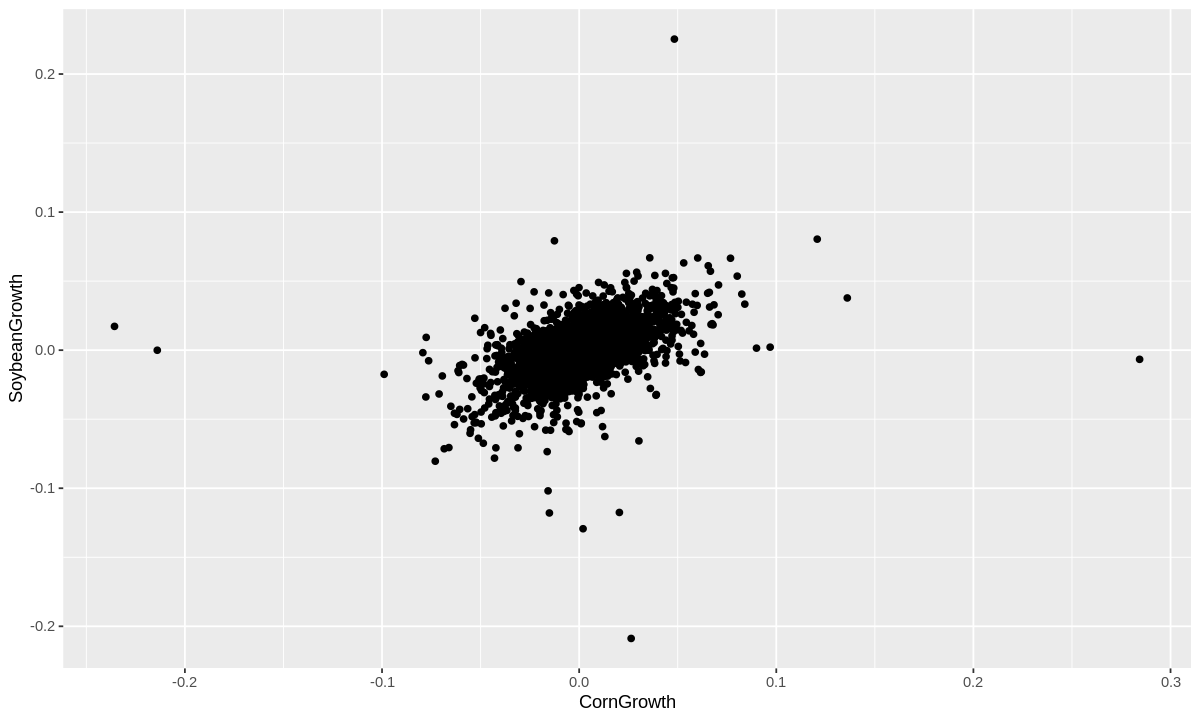

In [12]:
ggplot(commodities) +
    geom_point(aes(CornGrowth, SoybeanGrowth))

In [13]:
summary(lm(SoybeanGrowth~CornGrowth, data=commodities))


Call:
lm(formula = SoybeanGrowth ~ CornGrowth, data = commodities)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.220406 -0.006762  0.000342  0.007092  0.204115 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.824e-05  2.051e-04    0.43    0.667    
CornGrowth  4.364e-01  1.082e-02   40.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01408 on 4709 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.2566,	Adjusted R-squared:  0.2565 
F-statistic:  1626 on 1 and 4709 DF,  p-value: < 2.2e-16


In [14]:
summary(lm(SoybeanGrowth~CornGrowth, data=filter(commodities, abs(CornGrowth) < 0.1, abs(SoybeanGrowth < 0.1))))


Call:
lm(formula = SoybeanGrowth ~ CornGrowth, data = filter(commodities, 
    abs(CornGrowth) < 0.1, abs(SoybeanGrowth < 0.1)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.221681 -0.006734  0.000351  0.007136  0.085283 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.693e-05  1.956e-04   0.087    0.931    
CornGrowth  4.875e-01  1.105e-02  44.121   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01341 on 4703 degrees of freedom
Multiple R-squared:  0.2927,	Adjusted R-squared:  0.2926 
F-statistic:  1947 on 1 and 4703 DF,  p-value: < 2.2e-16


Warning message:
“Removed 40 rows containing missing values (geom_point).”

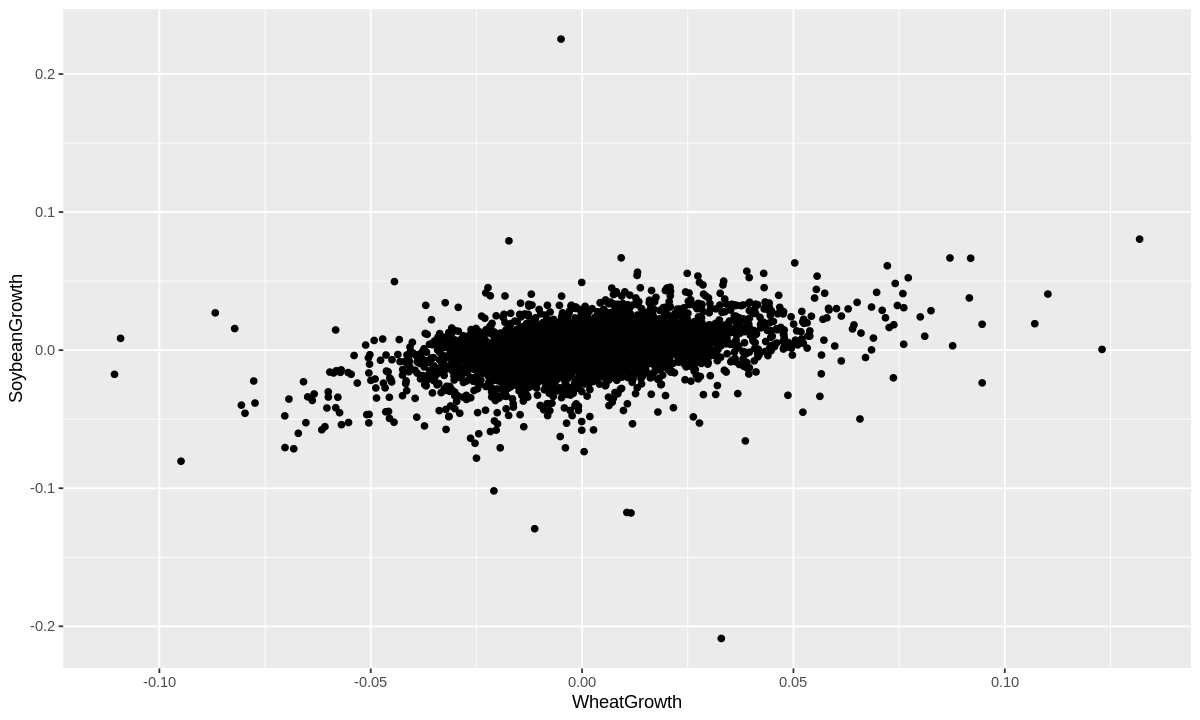

In [15]:
ggplot(commodities) +
    geom_point(aes(WheatGrowth, SoybeanGrowth))

In [16]:
summary(lm(SoybeanGrowth~WheatGrowth, data=commodities))


Call:
lm(formula = SoybeanGrowth ~ WheatGrowth, data = commodities)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.219308 -0.007412  0.000385  0.007922  0.226758 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0001031  0.0002188   0.471    0.638    
WheatGrowth 0.3157928  0.0108186  29.190   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01502 on 4711 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.1532,	Adjusted R-squared:  0.153 
F-statistic: 852.1 on 1 and 4711 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2585 rows containing missing values (geom_point).”

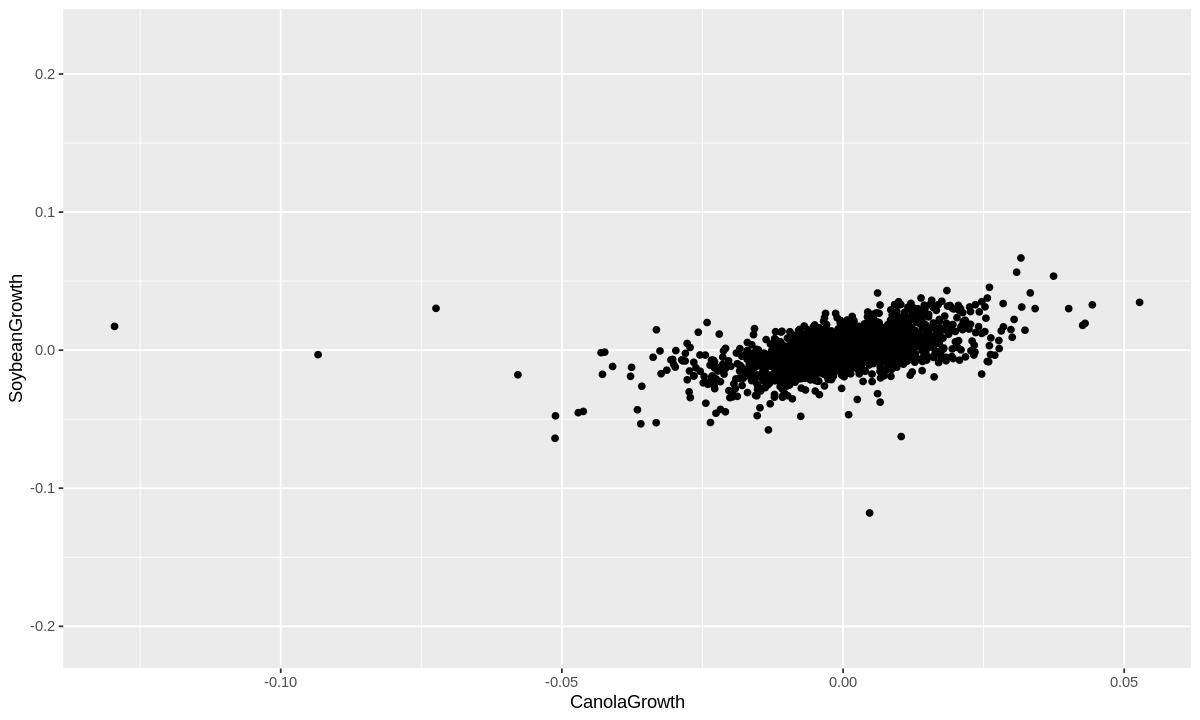

In [20]:
ggplot(commodities) +
    geom_point(aes(CanolaGrowth, SoybeanGrowth))

In [22]:
summary(lm(SoybeanGrowth~CanolaGrowth, data=commodities))


Call:
lm(formula = SoybeanGrowth ~ CanolaGrowth, data = commodities)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.120688 -0.006344  0.000092  0.006152  0.095087 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.156e-05  2.389e-04   -0.30    0.765    
CanolaGrowth  6.004e-01  2.083e-02   28.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01112 on 2166 degrees of freedom
  (2585 observations deleted due to missingness)
Multiple R-squared:  0.2772,	Adjusted R-squared:  0.2769 
F-statistic: 830.6 on 1 and 2166 DF,  p-value: < 2.2e-16


In [27]:
summary(lm(SoybeanGrowth~CanolaGrowth+CornGrowth, data=commodities))


Call:
lm(formula = SoybeanGrowth ~ CanolaGrowth + CornGrowth, data = commodities)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.116939 -0.005641  0.000130  0.005404  0.126405 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.215e-05  2.266e-04  -0.318     0.75    
CanolaGrowth  4.667e-01  2.153e-02  21.680   <2e-16 ***
CornGrowth    2.064e-01  1.317e-02  15.667   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01055 on 2163 degrees of freedom
  (2587 observations deleted due to missingness)
Multiple R-squared:  0.351,	Adjusted R-squared:  0.3504 
F-statistic: 584.8 on 2 and 2163 DF,  p-value: < 2.2e-16


In [24]:
summary(lm(CanolaGrowth~CornGrowth, data=commodities))


Call:
lm(formula = CanolaGrowth ~ CornGrowth, data = commodities)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099738 -0.005637  0.000196  0.005939  0.042687 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.935e-05  2.230e-04  -0.087    0.931    
CornGrowth   2.418e-01  1.191e-02  20.305   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01046 on 2200 degrees of freedom
  (2551 observations deleted due to missingness)
Multiple R-squared:  0.1578,	Adjusted R-squared:  0.1574 
F-statistic: 412.3 on 1 and 2200 DF,  p-value: < 2.2e-16


Warning message:
“Removed 3483 rows containing missing values (geom_point).”

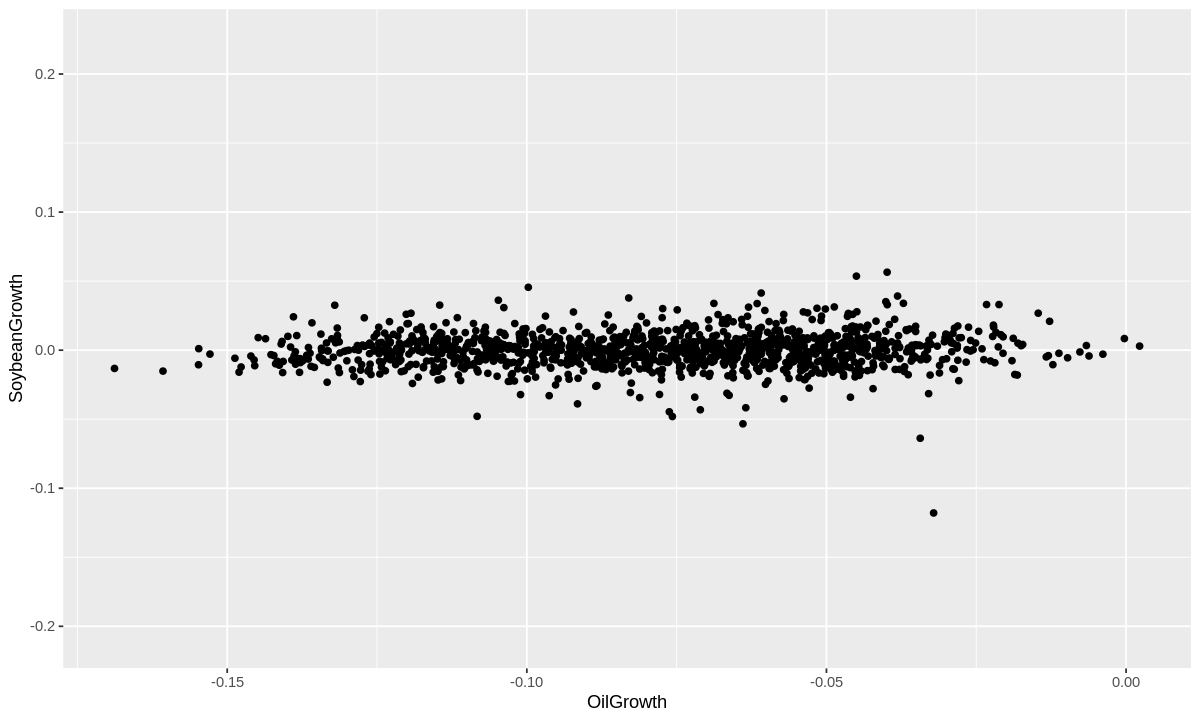

In [21]:
ggplot(commodities) +
    geom_point(aes(OilGrowth, SoybeanGrowth))

In [19]:
summary(lm(SoybeanGrowth~OilGrowth, data=commodities))


Call:
lm(formula = SoybeanGrowth ~ OilGrowth, data = commodities)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.118824 -0.007067  0.000243  0.006472  0.055726 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.0016355  0.0009469   1.727   0.0844 .
OilGrowth   0.0227717  0.0112286   2.028   0.0428 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01249 on 1268 degrees of freedom
  (3483 observations deleted due to missingness)
Multiple R-squared:  0.003233,	Adjusted R-squared:  0.002447 
F-statistic: 4.113 on 1 and 1268 DF,  p-value: 0.04277


In [31]:
summary(lm(SoybeanGrowth~CanolaGrowth+CornGrowth, data=commodities))


Call:
lm(formula = SoybeanGrowth ~ CanolaGrowth + CornGrowth, data = commodities)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.116939 -0.005641  0.000130  0.005404  0.126405 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.215e-05  2.266e-04  -0.318     0.75    
CanolaGrowth  4.667e-01  2.153e-02  21.680   <2e-16 ***
CornGrowth    2.064e-01  1.317e-02  15.667   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01055 on 2163 degrees of freedom
  (2587 observations deleted due to missingness)
Multiple R-squared:  0.351,	Adjusted R-squared:  0.3504 
F-statistic: 584.8 on 2 and 2163 DF,  p-value: < 2.2e-16


In [32]:
summary(lm(SoybeanGrowth~OilGrowth+CanolaGrowth+CornGrowth, data=commodities))


Call:
lm(formula = SoybeanGrowth ~ OilGrowth + CanolaGrowth + CornGrowth, 
    data = commodities)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.114609 -0.005286 -0.000026  0.005135  0.037546 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0002894  0.0007186   0.403    0.687    
OilGrowth    0.0049125  0.0085678   0.573    0.567    
CanolaGrowth 0.4751355  0.0288834  16.450   <2e-16 ***
CornGrowth   0.3768193  0.0197738  19.057   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009288 on 1203 degrees of freedom
  (3546 observations deleted due to missingness)
Multiple R-squared:  0.4405,	Adjusted R-squared:  0.4391 
F-statistic: 315.8 on 3 and 1203 DF,  p-value: < 2.2e-16


In [49]:
summary(lm(SoybeanGrowth~CanolaGrowth+CornGrowth+WheatGrowth, data=commodities))


Call:
lm(formula = SoybeanGrowth ~ CanolaGrowth + CornGrowth + WheatGrowth, 
    data = commodities)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.119220 -0.005533  0.000137  0.005690  0.110761 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.194e-05  2.227e-04  -0.278    0.781    
CanolaGrowth  4.417e-01  2.135e-02  20.689   <2e-16 ***
CornGrowth    1.447e-01  1.473e-02   9.822   <2e-16 ***
WheatGrowth   1.261e-01  1.435e-02   8.783   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01037 on 2162 degrees of freedom
  (2587 observations deleted due to missingness)
Multiple R-squared:  0.3733,	Adjusted R-squared:  0.3725 
F-statistic: 429.3 on 3 and 2162 DF,  p-value: < 2.2e-16


Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 39 rows containing missing values (geom_path).”Warning message:
“Removed 2 rows containing missing values (geom_path).”

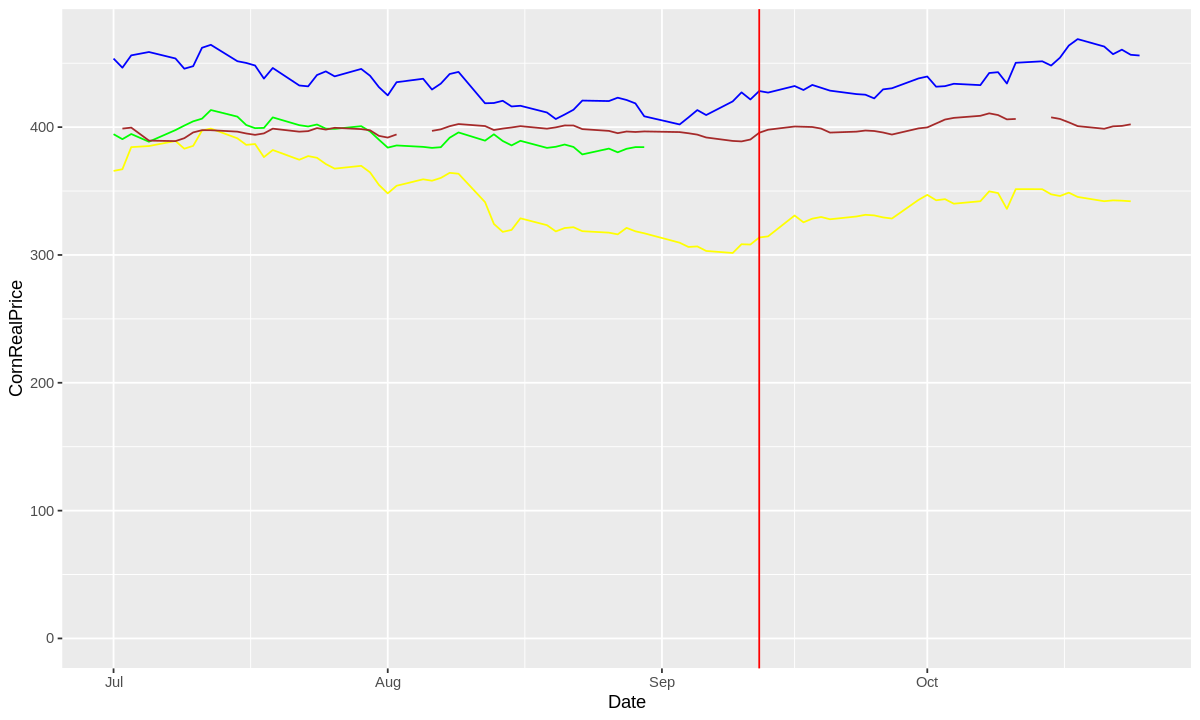

In [60]:
commodities %>% 
    filter(Date >= '2019-07-01') %>%
ggplot() +
    geom_line(aes(Date, CornRealPrice), color='yellow') +
    geom_line(aes(Date, SoybeanRealPrice / 2), color='green') +
    geom_line(aes(Date, CanolaRealPrice), color='brown') +
    geom_line(aes(Date, WheatRealPrice), color='blue') +
    geom_vline(aes(xintercept=as.Date('2019-9-12')), color='red') +
    expand_limits(y=0)

### Build Models

In [92]:
commoditiesImputed <- commodities %>% 
    mutate(
        CanolaPrice = na_interpolation(CanolaPrice, 'linear'),
        CanolaRealPrice = CanolaPrice / GDPDef,
        CanolaDiff = CanolaRealPrice - lag(CanolaRealPrice),
        CanolaGrowth = CanolaDiff / lag(CanolaRealPrice),
        SoybeanMealPrice = na_interpolation(SoybeanMealPrice, 'linear'),
        SoybeanMealRealPrice = SoybeanMealPrice / GDPDef,
        SoybeanMealDiff = SoybeanMealRealPrice - lag(SoybeanMealRealPrice),
        SoybeanMealGrowth = SoybeanMealDiff / lag(SoybeanMealRealPrice)
    )
trainData <- commoditiesImputed %>% 
    filter(Date < '2018-01-01', Date >= '2010-08-16')
testData <- commoditiesImputed %>% 
    filter(Date >= '2018-01-01', Date <= '2019-08-31')